#Importing Data 

In [9]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_20newsgroups
class1 = ['comp.graphics', 'comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware']
class2 = ['rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
twenty_class1 = fetch_20newsgroups(categories=class1, remove = ('headers','footers'), random_state=42)
twenty_class2 = fetch_20newsgroups(categories=class2, remove = ('headers','footers'), random_state=42)

In [3]:
from pprint import pprint
pprint(list(twenty_class1.target_names))

['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware']


In [4]:
pprint(list(twenty_class2.target_names))

['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']


In [5]:
print(twenty_class1.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [6]:
print(len(twenty_class1.data)) 
print(len(twenty_class2.data)) 
print(len(twenty_class1.target_names))
print(len(twenty_class2.target_names))

2343
2389
4
4


In [7]:
class1Data = twenty_class1['data']
class2Data = twenty_class2['data']

In [10]:
class1DF = pd.DataFrame(class1Data, columns=['data'])
class1DF['target'] = np.ones(len(class1Data))

In [11]:
class2DF = pd.DataFrame(class2Data, columns=['data'])
class2DF['target'] = np.ones(len(class2Data))*2

In [12]:
print(len(class1DF['data']))
print(len(class2DF['data']))

2343
2389


In [13]:
df = pd.concat([class1DF,class2DF],axis=0,ignore_index=True) # concatenate along rows

In [14]:
df.shape

(4732, 2)

In [15]:
df.dtypes

data       object
target    float64
dtype: object

In [16]:
print(df.data[0])

In article <1qksuq$1tt8@hal.gnu.ai.mit.edu>, mirsky@hal.gnu.ai.mit.edu
(David Joshua Mirsky) writes:
|> Hi. I own an LCIII and I recently heard an interesting rumor.
|> I heard that the LCIII has a built in slot for a PowerPC chip.
|> Is this true? I heard that the slot is not the same as the PDS
|> slot.  Is that true?
|> 
|> Thanks
|> David Mirsky
|> mirsky@gnu.ai.mit.edu

Well, I also have an LC III.  Popping the top revealed:

	One "socket" for an additional VRAM SIMM

	One "socket" for a 72-pin RAM SIMM

	One socket for a flat-pack FPU

	A processor-direct slot (PDS) identical to the LC/LC II, but with
	an additional set of connetions to one side (for the full 32-bit
	data path that the LC/LC II lacked

That's it.  I guess a board with a PowerPC chip could be made that would fit
in the PDS, but that's the only place.


In [21]:
labels = df.target

**Data to use is: df
Columns: 'data' (document), 'target' (class)**

# Question 1

In [18]:
# transform documents into TF-IDF vectors
    # min_df = 3
    # exclude stopwords
    # remove headers and footers #TODO: STILL NEED TO REMOVE HEADER AND FOOTER
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=3, stop_words='english')
vectors = vectorizer.fit_transform(df.data.values)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidfVectors = tfidf_transformer.fit_transform(vectors)

print("TF-IDF matrix dimensions: " + str(tfidfVectors.shape))

TF-IDF matrix dimensions: (4732, 17131)


# Question 2 and 3

In [37]:
from sklearn import metrics
from time import time
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
evaluations = []
evaluations_std = []

def fit_and_evaluate(km, X, name=None, n_runs=5):
  name = km.__class__.__name__ if name is None else name

  train_times=[]
  scores=defaultdict(list)
  for seed in range(n_runs):
    km.set_params(random_state=seed)
    t0=time()
    km.fit(X)
    train_times = np.append(train_times, time() - t0)


    scores["Homogeneity"].append(metrics.homogeneity_score(labels,km.labels_))
    scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
    scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
    scores["Adjusted Rand-Index"].append(metrics.adjusted_rand_score(labels, km.labels_))
    scores["Adjusted Mutual Information"].append(metrics.adjusted_mutual_info_score(labels, km.labels_))

    train_times = np.asarray(train_times)
    print(f"\nclustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }

    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }

    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

    contingencyMatrix = metrics.cluster.contingency_matrix(labels, km.labels_)
    ax = plt.axes()
    s = sns.heatmap(contingencyMatrix, annot=True, cmap='Blues', ax=ax)
    ax.set_title("Contingency Matrix for KMeans")
    plt.show()


clustering done in 1.54 ± 0.00 s 
Homogeneity: 0.584 ± 0.000
Completeness: 0.595 ± 0.000
V-measure: 0.589 ± 0.000
Adjusted Rand-Index: 0.655 ± 0.000
Adjusted Mutual Information: 0.589 ± 0.000


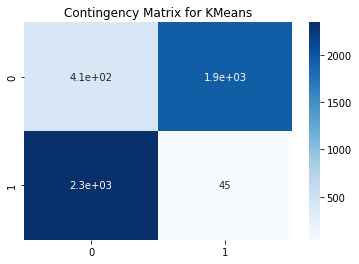


clustering done in 2.38 ± 0.84 s 
Homogeneity: 0.578 ± 0.005
Completeness: 0.590 ± 0.005
V-measure: 0.584 ± 0.005
Adjusted Rand-Index: 0.649 ± 0.006
Adjusted Mutual Information: 0.584 ± 0.005


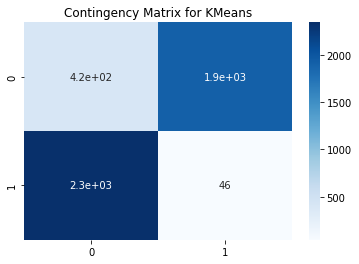


clustering done in 2.09 ± 0.80 s 
Homogeneity: 0.579 ± 0.004
Completeness: 0.591 ± 0.004
V-measure: 0.585 ± 0.004
Adjusted Rand-Index: 0.649 ± 0.005
Adjusted Mutual Information: 0.585 ± 0.004


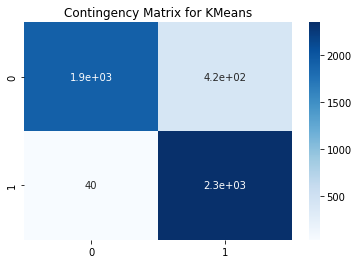

In [53]:
# K-means clustering
    # k = 2
    # use the TF-IDF data
    # random_state = 0, max_iter>=1000, n_init>=30

# Obtain clustering results and ground truth labels
# contingency table A
    # A_ij = # of data points that belond to the ith class and the jth cluster

# report contingency table
# use plotmat.py to visualize the matrix
# report clustering measurements: homogeneity, completeness, v-measure, adjusted rand index, adjusted mutual information score

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
fit_and_evaluate(kmeans,X_tfidfVectors, name="KMeans\non tf-idf vectors", n_runs=3)

# Question 4

1
10
100
200
300
400
500
600
700
800
900
1000


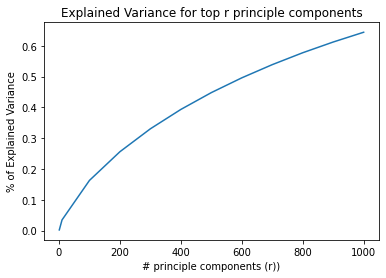

In [55]:
# see what ratio of the variance of the original data is retained after dimensionality reduction
# create truncated SVD representation of TF-IDF matrix
from sklearn.decomposition import TruncatedSVD

principleComponents = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
explainedVariance = np.zeros(12)

i = 0

for r in principleComponents:
  svd = TruncatedSVD(n_components=r)
  svd.fit_transform(X_tfidfVectors)
  explainedVariance[i] = svd.explained_variance_ratio_.sum()
  i = i+1

# report plot of percentage of variance that the top r principle components retain vs. r (for r=1 to 1000)
plt.plot(principleComponents,explainedVariance)
plt.xlabel("# principle components (r)")
plt.ylabel("% of Explained Variance")
plt.title("Explained Variance for top r principle components")
plt.show()


another way of coding SVD

1
51
101
151
201
251
301
351
401
451
501
551
601
651
701
751
801
851
901
951


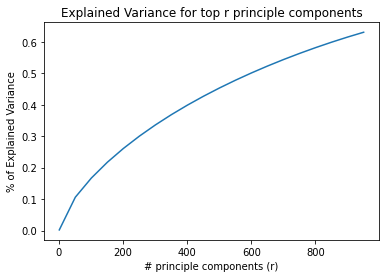

In [66]:
# see what ratio of the variance of the original data is retained after dimensionality reduction
# create truncated SVD representation of TF-IDF matrix
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000)
svd.fit_transform(X_tfidfVectors)
principleComponents = list(range(1,1001,50))
i=0

explainedVariance = np.zeros(len(principleComponents))
for r in principleComponents:
  for k in range (0,r):
    explainedVariance[i] = explainedVariance[i]+svd.explained_variance_ratio_[k]
  i = i+1
  print(r)

# report plot of percentage of variance that the top r principle components retain vs. r (for r=1 to 1000)
plt.plot(principleComponents,explainedVariance)
plt.xlabel("# principle components (r)")
plt.ylabel("% of Explained Variance")
plt.title("Explained Variance for top r principle components")
plt.show()


# Question 5, 6, and 7

X_tfidfVectors 
labels

##Truncated SVD/PCA

(4732, 300)
1
(4732, 1)

clustering done in 0.12 ± 0.00 s 
Homogeneity: 0.015 ± 0.000
Completeness: 0.015 ± 0.000
V-measure: 0.015 ± 0.000
Adjusted Rand-Index: 0.020 ± 0.000
Adjusted Mutual Information: 0.015 ± 0.000


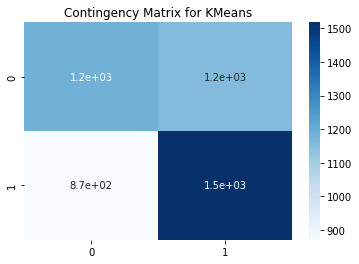

10
(4732, 10)

clustering done in 2.28 ± 0.00 s 
Homogeneity: 0.562 ± 0.000
Completeness: 0.575 ± 0.000
V-measure: 0.568 ± 0.000
Adjusted Rand-Index: 0.627 ± 0.000
Adjusted Mutual Information: 0.568 ± 0.000


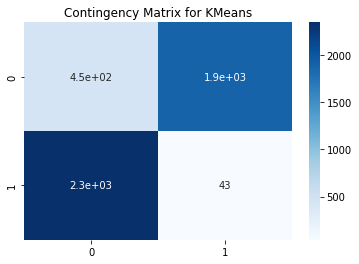

20
(4732, 20)

clustering done in 3.04 ± 0.00 s 
Homogeneity: 0.574 ± 0.000
Completeness: 0.587 ± 0.000
V-measure: 0.581 ± 0.000
Adjusted Rand-Index: 0.643 ± 0.000
Adjusted Mutual Information: 0.580 ± 0.000


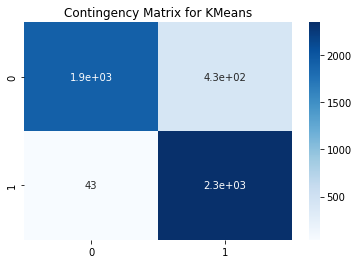

50
(4732, 50)

clustering done in 2.60 ± 0.00 s 
Homogeneity: 0.571 ± 0.000
Completeness: 0.584 ± 0.000
V-measure: 0.577 ± 0.000
Adjusted Rand-Index: 0.639 ± 0.000
Adjusted Mutual Information: 0.577 ± 0.000


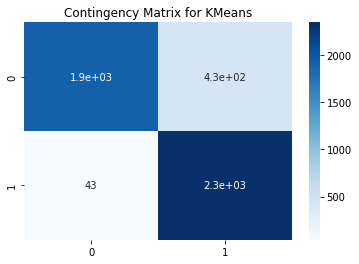

100
(4732, 100)

clustering done in 3.07 ± 0.00 s 
Homogeneity: 0.573 ± 0.000
Completeness: 0.585 ± 0.000
V-measure: 0.579 ± 0.000
Adjusted Rand-Index: 0.640 ± 0.000
Adjusted Mutual Information: 0.579 ± 0.000


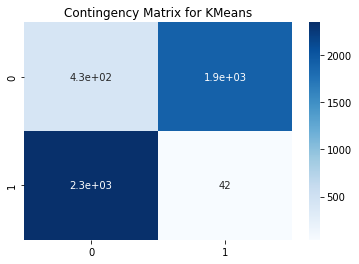

300
(4732, 300)

clustering done in 5.13 ± 0.00 s 
Homogeneity: 0.574 ± 0.000
Completeness: 0.586 ± 0.000
V-measure: 0.580 ± 0.000
Adjusted Rand-Index: 0.642 ± 0.000
Adjusted Mutual Information: 0.580 ± 0.000


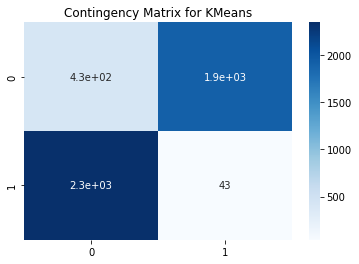

In [82]:
# choose the dimension that yields the best result in terms of clustering purity metrics
# r = n_components
# r = 1, 10, 20, 50, 100, 300

principleComponents = [1, 10, 20, 50, 100, 300]

svd = TruncatedSVD(n_components=300)
X_svd = svd.fit_transform(X_tfidfVectors)
print(X_svd.shape)

kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)

for r in principleComponents:
  X_svd_r = X_svd[0:, 0:r]
  print(r)
  print(X_svd_r.shape)
  fit_and_evaluate(kmeans,X_svd_r, name="KMeans\non tf-idf vectors", n_runs=1)

1
(4732, 1)
10
(4732, 10)
20
(4732, 20)
50
(4732, 50)
100
(4732, 100)
300
(4732, 300)


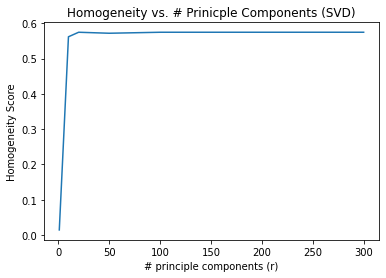

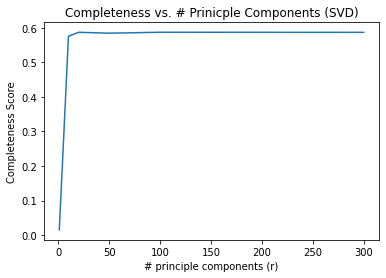

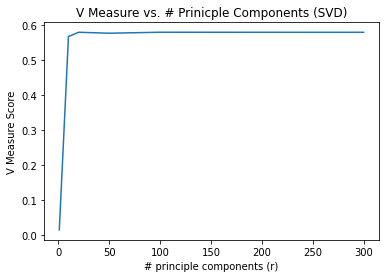

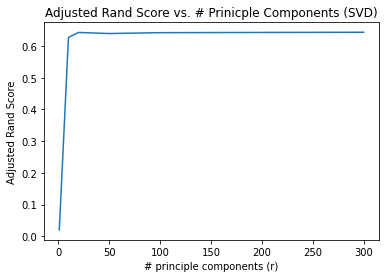

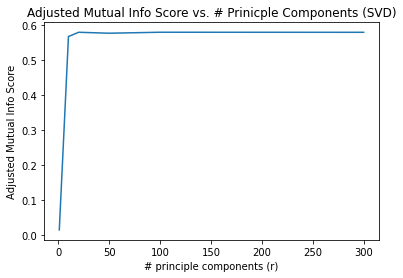

In [83]:
principleComponents = [1, 10, 20, 50, 100, 300]

svd = TruncatedSVD(n_components=300)
X_svd = svd.fit_transform(X_tfidfVectors)
homogeneity = []
completeness = []
vMeasure = []
adjustedRand = []
adjustedMutual = []

kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)

for r in principleComponents:
  X_svd_r = X_svd[0:, 0:r]
  print(r)
  print(X_svd_r.shape)
  kmeans.fit(X_svd_r)
  homogeneity.append(metrics.homogeneity_score(labels,kmeans.labels_))
  completeness.append(metrics.completeness_score(labels, kmeans.labels_))
  vMeasure.append(metrics.v_measure_score(labels, kmeans.labels_))
  adjustedRand.append(metrics.adjusted_rand_score(labels, kmeans.labels_))
  adjustedMutual.append(metrics.adjusted_mutual_info_score(labels, kmeans.labels_))

# report plot of percentage of variance that the top r principle components retain vs. r (for r=1 to 1000)
plt.plot(principleComponents,homogeneity)
plt.xlabel("# principle components (r)")
plt.ylabel("Homogeneity Score")
plt.title("Homogeneity vs. # Prinicple Components (SVD)")
plt.show()

plt.plot(principleComponents,completeness)
plt.xlabel("# principle components (r)")
plt.ylabel("Completeness Score")
plt.title("Completeness vs. # Prinicple Components (SVD)")
plt.show()

plt.plot(principleComponents,vMeasure)
plt.xlabel("# principle components (r)")
plt.ylabel("V Measure Score")
plt.title("V Measure vs. # Prinicple Components (SVD)")
plt.show()

plt.plot(principleComponents,adjustedRand)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score vs. # Prinicple Components (SVD)")
plt.show()

plt.plot(principleComponents,adjustedMutual)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Mutual Info Score")
plt.title("Adjusted Mutual Info Score vs. # Prinicple Components (SVD)")
plt.show()

In [84]:
print(principleComponents)
print(adjustedMutual)

[1, 10, 20, 50, 100, 300]
[0.0147045060338383, 0.568209206981471, 0.5804513175249695, 0.5777620811241628, 0.580533910433762, 0.5803778721973041]


##NMF

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


1
(4732, 1)


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


10
(4732, 10)


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


20
(4732, 20)


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


50
(4732, 50)


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


100
(4732, 100)


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


300
(4732, 300)


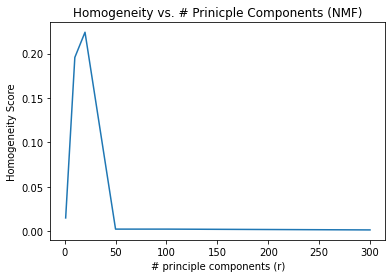

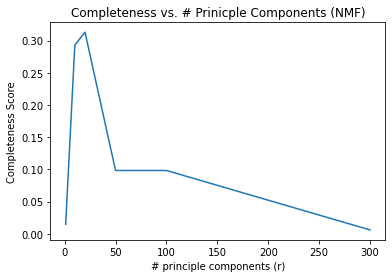

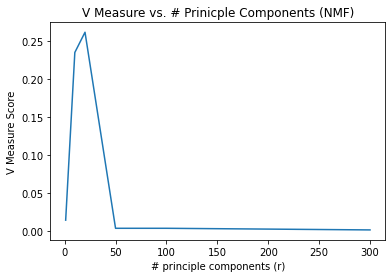

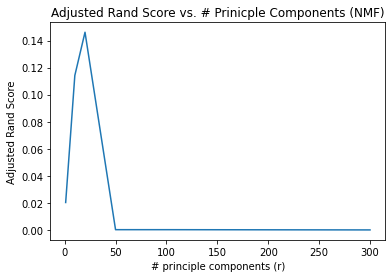

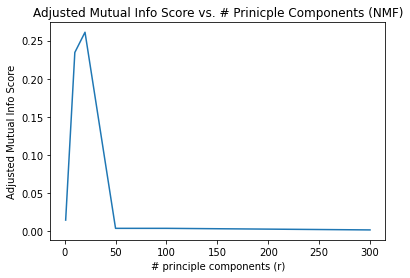

In [81]:
from sklearn.decomposition import NMF

principleComponents = [1, 10, 20, 50, 100, 300]

homogeneity = []
completeness = []
vMeasure = []
adjustedRand = []
adjustedMutual = []

kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)

for r in principleComponents:
  nmf = NMF(n_components=r)
  X_nmf = nmf.fit_transform(X_tfidfVectors)
  
  print(r)
  print(X_nmf.shape)
  kmeans.fit(X_nmf)

  homogeneity.append(metrics.homogeneity_score(labels,kmeans.labels_))
  completeness.append(metrics.completeness_score(labels, kmeans.labels_))
  vMeasure.append(metrics.v_measure_score(labels, kmeans.labels_))
  adjustedRand.append(metrics.adjusted_rand_score(labels, kmeans.labels_))
  adjustedMutual.append(metrics.adjusted_mutual_info_score(labels, kmeans.labels_))

# report plot of percentage of variance that the top r principle components retain vs. r (for r=1 to 1000)
plt.plot(principleComponents,homogeneity)
plt.xlabel("# principle components (r)")
plt.ylabel("Homogeneity Score")
plt.title("Homogeneity vs. # Prinicple Components (NMF)")
plt.show()

plt.plot(principleComponents,completeness)
plt.xlabel("# principle components (r)")
plt.ylabel("Completeness Score")
plt.title("Completeness vs. # Prinicple Components (NMF)")
plt.show()

plt.plot(principleComponents,vMeasure)
plt.xlabel("# principle components (r)")
plt.ylabel("V Measure Score")
plt.title("V Measure vs. # Prinicple Components (NMF)")
plt.show()

plt.plot(principleComponents,adjustedRand)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score vs. # Prinicple Components (NMF)")
plt.show()

plt.plot(principleComponents,adjustedMutual)
plt.xlabel("# principle components (r)")
plt.ylabel("Adjusted Mutual Info Score")
plt.title("Adjusted Mutual Info Score vs. # Prinicple Components (NMF)")
plt.show()

**Optimal choice of r:**

SVD:

NMF: